In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import numpy as np
import nbformat

In [4]:
df = pd.read_csv("sensordata_SAIL2025.csv")
df.tail(5)


,timestamp,CMSA-GAKH-01_0,CMSA-GAKH-01_180,CMSA-GAWW-11_120,CMSA-GAWW-11_300,CMSA-GAWW-12_115,CMSA-GAWW-12_295,CMSA-GAWW-13_120,CMSA-GAWW-13_300,CMSA-GAWW-14_40,...,GVCV-13_10,GVCV-13_190,GVCV-14_90,GVCV-14_270,hour,minute,day,month,weekday,is_weekend
2395,2025-08-24 23:45:00+02:00,11,9,38,44,51,51,6,19,18,...,10,12,0,0,23,45,24,8,6,1
2396,2025-08-24 23:48:00+02:00,2,1,46,42,30,45,34,33,8,...,1,6,23,6,23,48,24,8,6,1
2397,2025-08-24 23:51:00+02:00,10,2,51,26,42,59,21,30,22,...,0,0,0,8,23,51,24,8,6,1
2398,2025-08-24 23:54:00+02:00,3,1,24,36,42,32,12,55,9,...,0,0,2,8,23,54,24,8,6,1
2399,2025-08-24 23:57:00+02:00,6,1,38,65,56,41,21,45,10,...,79,2,1,2,23,57,24,8,6,1


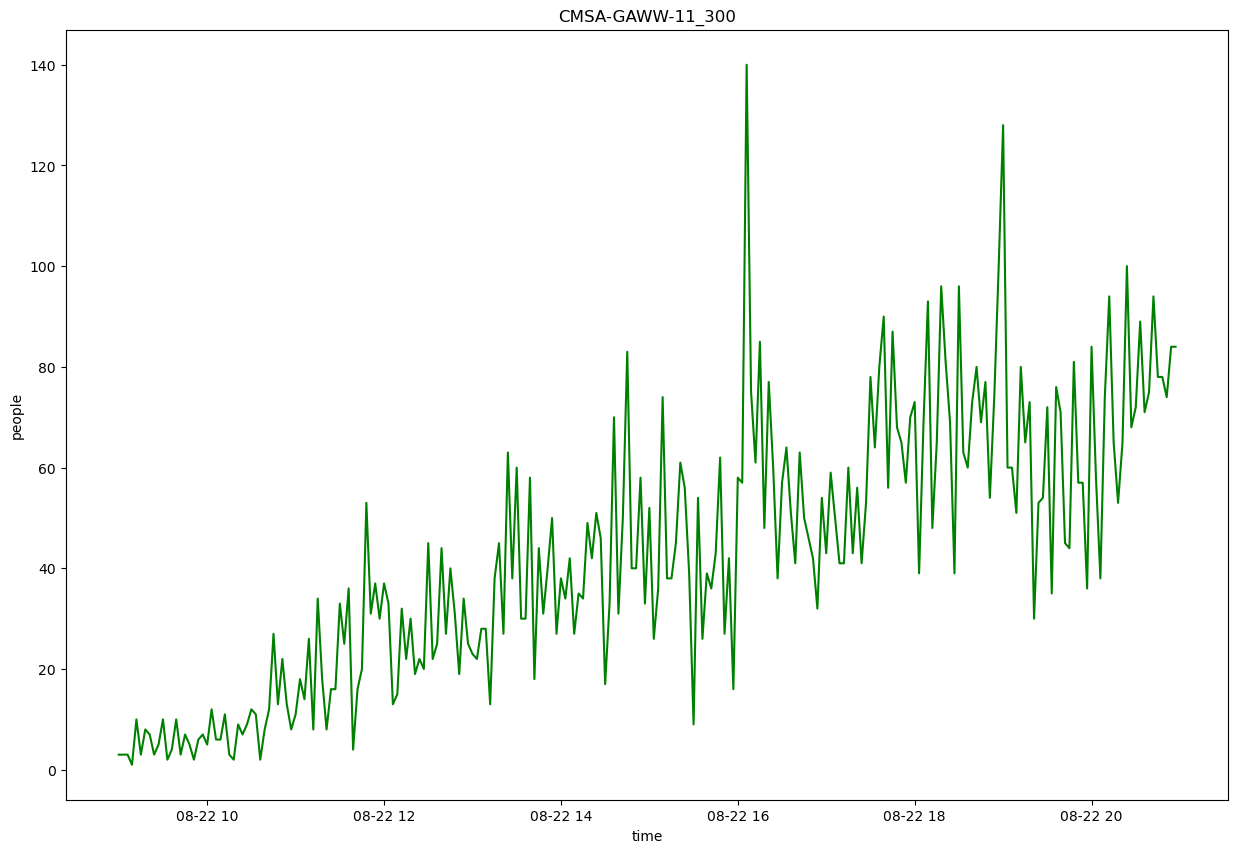

In [5]:
import matplotlib.pyplot as plt
df['timestamp'] = pd.to_datetime(df['timestamp'])
#one_day = df[df['day'] == 22] & (df['timestamp'].dt.hour >= 10)
one_day = df[(df['day'] == 22) & (df['timestamp'].dt.hour >= 9) & (df['timestamp'].dt.hour <= 20)]


plt.figure(figsize=(15,10))
#plt.plot(one_day['timestamp'], one_day['CMSA-GAWW-11_300'], color='green')
plt.plot(one_day['timestamp'], one_day['CMSA-GAWW-11_300'], color='green')
plt.xlabel('time')
plt.ylabel('people')
plt.title("CMSA-GAWW-11_300")


plt.show()

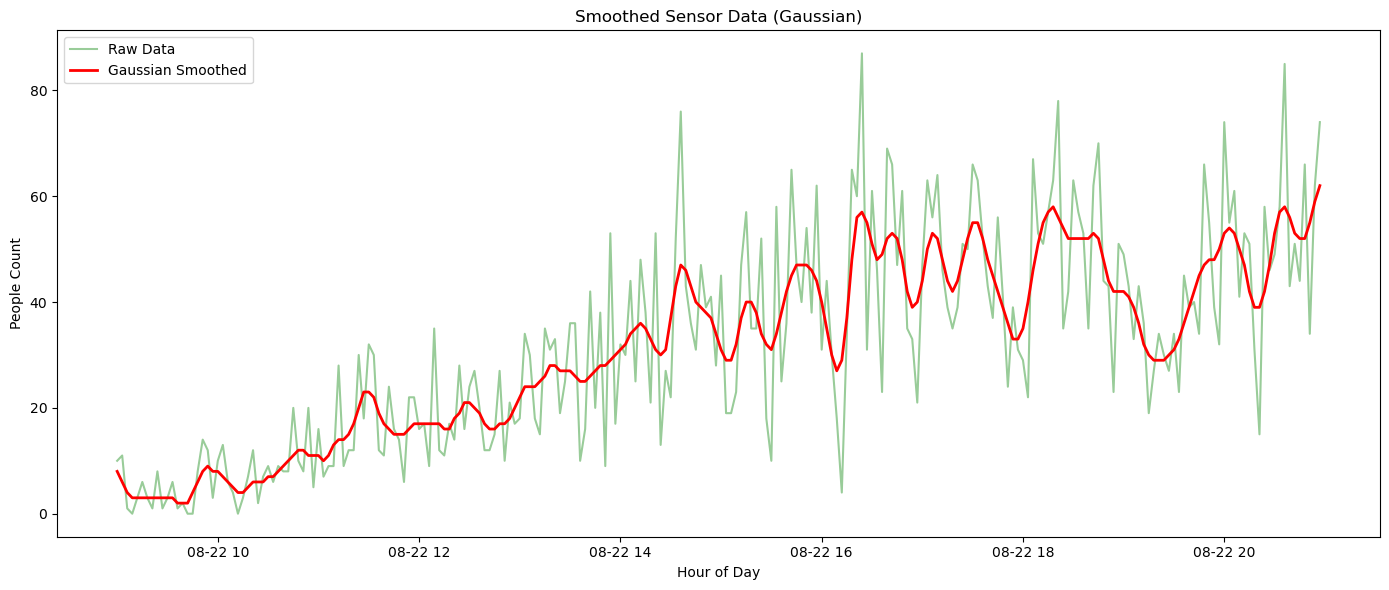

In [6]:
from scipy.ndimage import gaussian_filter1d

y = one_day['CMSA-GAWW-17_40']
smooth_y = gaussian_filter1d(y, sigma=1.7)  # sigma controls smoothness

plt.figure(figsize=(14,6))
plt.plot(one_day['timestamp'], y, color='green', alpha=0.4, label='Raw Data')
plt.plot(one_day['timestamp'], smooth_y, color='red', linewidth=2, label='Gaussian Smoothed')
plt.xlabel('Hour of Day')
plt.ylabel('People Count')
plt.title('Smoothed Sensor Data (Gaussian)')
plt.legend()
plt.tight_layout()
plt.show()


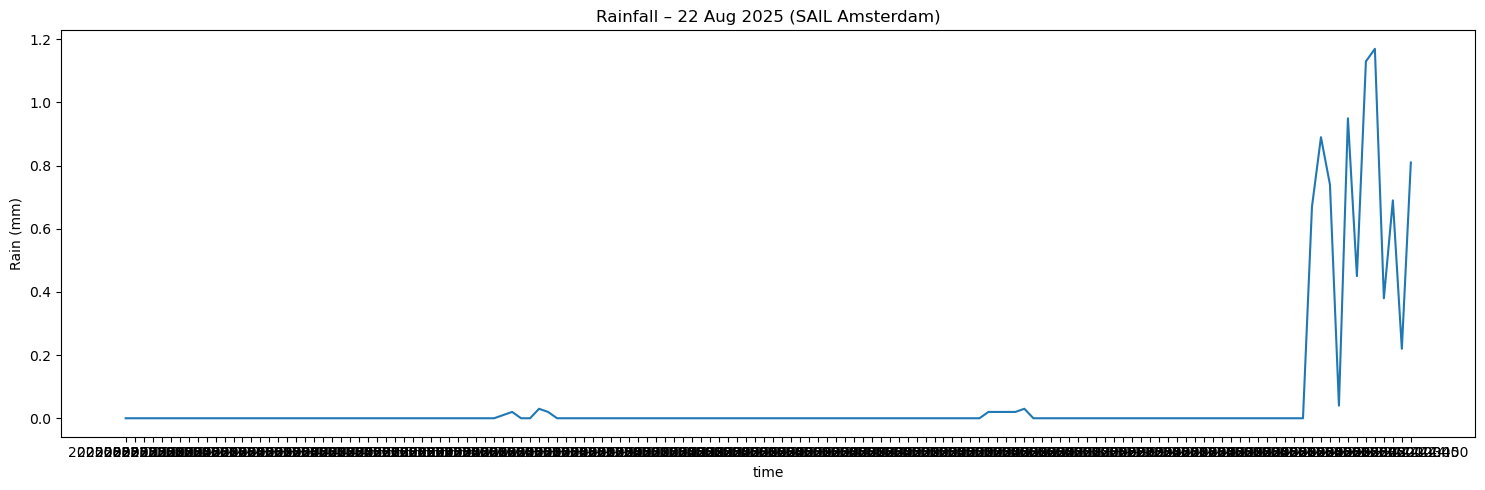

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
fr = pd.read_csv("SAIL_Amsterdam_10min_Weather_2025-08-20_to_2025-08-24.csv")

fr = fr[fr['DateTime'].astype(str).str.startswith('20250822')]

plt.figure(figsize=(15,5))
plt.plot(fr['DateTime'],fr['Rain_mm'])
plt.xlabel('time')
plt.ylabel('Rain (mm)')
plt.title('Rainfall – 22 Aug 2025 (SAIL Amsterdam)')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_20688\1404682355.py:99: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s["timestamp"] = pd.to_datetime(s[ts_col], errors="coerce", infer_datetime_format=True)


KeyError: "['sensor_id'] not in index"